In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("✅ Caricato le librerie")

sns.set_theme(style="whitegrid")
df = pd.read_csv("../data/housing.csv")
print("✅ Caricato i dati")

✅ Caricato le librerie
✅ Caricato i dati


## Includere più campi
proviamo includendo tutti i campi numerici per vedere se sono stati omessi campi importanti

In [18]:
# prendo solo i valori numerici
numeric_df = df.select_dtypes(include="number")
print(numeric_df.head(2))

# tutti i dati, escluso il prezzo
X = numeric_df.drop(columns='price')
# solo la colonna prezzo
y = df['price']
# diviso in 80-20 il dataset in train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3


## Alleno il modello con più colonne

In [23]:
# alleno il modello
model = LinearRegression()
model.fit(X_train, y_train)
# faccio la previsione
y_pred = model.predict(X_test)
# verifico la previsione
r2_error = r2_score(y_test, y_pred)
print(f"R2 error: {r2_error:.2f}%")

R2 error: 0.55%


## Grafico dispersione
### rispetto a 43% è un passo notevole

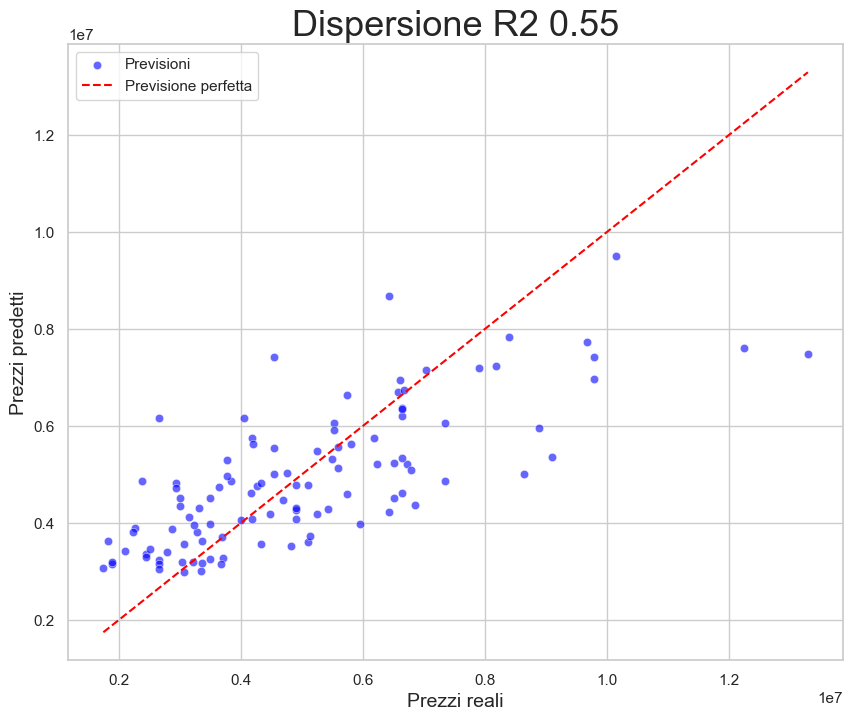

In [51]:
min_value = df['price'].min()
max_value = df['price'].max()

plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", label="Previsioni")
plt.plot([min_value, max_value], [min_value, max_value], linestyle="--", color="red", label="Previsione perfetta")
plt.title("Dispersione R2 0.55", size=26)
plt.xlabel("Prezzi reali", size=14)
plt.ylabel("Prezzi predetti", size=14)
plt.legend()
plt.show()